# **Projet Complet de Data Science**

## **Construction d'un modèles de Machine Learning pour prédire le désabonnement des clients d'une entreprise (CUSTOMER CHURN)**

### Table des Matières

- [Introduction](#Intro)
- [Importantion des outils nécessaires](#Import)
- [Importation des donnnées](#ImportData)
- [Analyse exploratoire des données](#AED)
- [Prétraitement des données](#PD)
- [Modélisation](#Mod) 
    - [Modèle de Régression Logistique](#MRG)
    - [Modèle de Forêt Aléatoire](#MFA)
    - [Classificateur Perceptron Multicouche](#CPM)   
    - [Support Vector Machine](#SVM)
- [Conclusion](#Concl)

<a name="Intro"></a>
## Introduction

![image](images/customer.jpg)

Le désabonnement d'un client se produit lorsque ce dernier décide de cesser d'utiliser les services, le contenu ou les produits d'une entreprise.
Il existe de nombreux exemples et cas de désabonnement:

- Annulation d'un service sous contrat ou non
- Achat dans un autre magasin concurrent
- Désabonnement d'une newsletter
- Clôture de compte bancaire
- Etc 

Ainsi, l'entreprise doit mieux comprendre le comportement de ses clients afin de les fidéliser.

Une façon de le faire consiste à créer **un modèle de Machine Learning ou de Réseau de Neuronnes Artificielles qui peut prédire quels sont les clients sont susceptibles de se désabonner.**

Dans ce projet, nous explorerons un ensemble de données d'une entreprise de télécommunications et créerons un modèle dans le but de prédire les clients présentant un risque de désabonnement plus élevé.

Nous utiliserons différents algorithmes de Machine Learning afin de comparer leurs performances puis nous déterminerons le meilleur modèle.

<a name="Import"></a>
## Importantion des outils nécessaires

In [206]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

Les données ont été téléchargées sur **[kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)**


In [207]:
# importation des données

df = pd.read_csv("RawData/Telco_Customer_Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


La description des variables se trouve ici **[description](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)**

La variable cible est la variable **Churn** qui prend deux valeurs : ***Yes** (Le client s'est désabonné* et ***No** (Le client ne s'est pas désabonné)*

In [208]:
# information sur les données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Il n'y a pas de valeurs manquantes dans ce jeu de données !

In [209]:
# Nombre de valeurs uniques par colonne

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<a name="AED"></a>
## Analyse Exploratoire des données

Commençons notre exploration en traçant un graphiques de la distribution de chaque variable

In [210]:
# Variables catégorielles

categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [211]:
# Création d'une fonction pour construire un graphique en bâton et de manière intéractive

def bar_plot(a):
    df[a].value_counts(normalize=True).plot(kind='bar')
    plt.title("Distribution of " + str(a))
    plt.ylabel("Proportion")
    return plt.show()

In [212]:
#Interact
interact(bar_plot, a = categorical_columns)

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

<function __main__.bar_plot(a)>

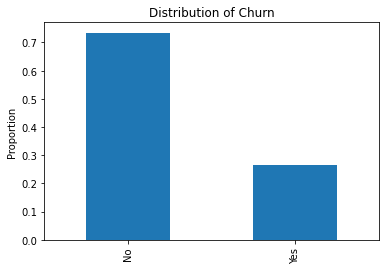

In [291]:
bar_plot("Churn")

Nous pouvons interagir avec le notebook en selectionnant la variable catégorielle qui nous intéresse.

Voici quelques informations importanytes que nous pouvons tirer de ces graphiques:
 
- Il y a plus de clients qui ne se sont pas désabonnés (70%) que de clients qui se sont désabonnés (30%)

Cela peut déséquilibrer les modèles

- Il y a presqu'autant d'hommes que de femmes
- Le nombre de clients formés des personnes agées est bien inférieur à celui des clients jeunes

Nous pouvons répéter le même processus cette fois-ci pour les variables numériques


In [213]:
# Echantillon aléatoire de la variable "TotalCharges"

df['TotalCharges'].sample(10)

6816       70.3
6617    3887.85
2804      259.8
6359    4238.45
853      352.65
53        633.3
6044        893
2903     432.25
5377      249.4
2569    1871.85
Name: TotalCharges, dtype: object

La présence d'espace au niveau de la variable TotalCharges la transforme en object alors qu'elle est numérique.

Remplaçons ces espaces

In [214]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [215]:
numerical_colums = ['tenure', 'MonthlyCharges', 'TotalCharges']

def hist_plot(b):
    sns.displot(df[b], kde = False)
    plt.title("Histogram of" + str(b))
    return plt.show()


In [216]:
#Interact
interact(hist_plot, b = numerical_colums)

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

<function __main__.hist_plot(b)>

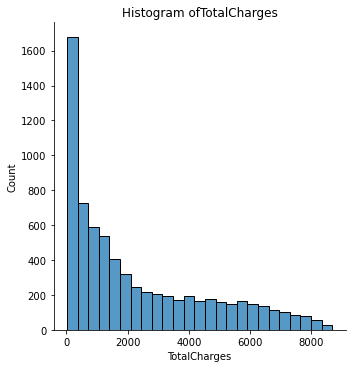

In [292]:
 hist_plot("TotalCharges")

In [217]:
# Coefficient d'asymétrie de la variable 'TotalCharges'

df['TotalCharges'].skew()

0.961642499724251

In [218]:
# Création d'une fonction de construction de boite à moustaches

def box_plot(c):
    sns.boxplot(y=df[c])
    plt.title("Boxplot of" + str(c))
    return plt.show()

In [219]:
interact(box_plot, c = numerical_colums)

interactive(children=(Dropdown(description='c', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

<function __main__.box_plot(c)>

Nous constatons une forte asymétrie dans ces variables, cela peut causer des erreurs au niveau des modèles

Comme astuce, nous pouvons appliquer des transformations afin de les rendre moins asymétrique.

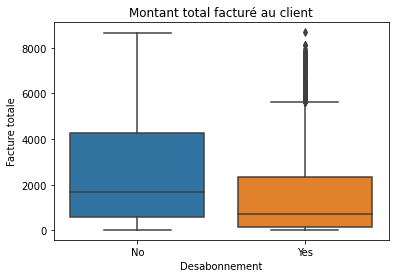

In [220]:
# TotalCharges vs Churn

sns.boxplot(data = df, x='Churn', y='TotalCharges')
plt.xlabel('Desabonnement')
plt.ylabel('Facture totale')
plt.title('Montant total facturé au client')
plt.show()

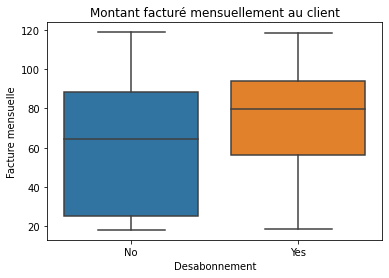

In [221]:
# MonthlyCharges vs Churn

sns.boxplot(data = df, x='Churn', y='MonthlyCharges')
plt.xlabel('Desabonnement')
plt.ylabel('Facture mensuelle')
plt.title('Montant facturé mensuellement au client')
plt.show()

Ainsi de suite, nous pouvons faire ce genre de comparaions. C'est cela l'exploration des données.

Un des résultat :

**Le montant facturé aux clients qui ont résilié leur contrat est inférieur au montant total facturé aux clients qui ne l'ont pas fait. Mais les clients qui se sont désabonnés sont plus facturés mensuellement que les clients qui ne se sont pas désabonnés**

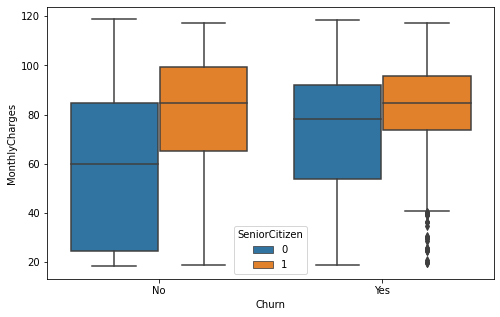

In [222]:
# MonthlyCharges vs Churn by SeniorCitizen
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x ="Churn", y = "MonthlyCharges", hue = "SeniorCitizen");

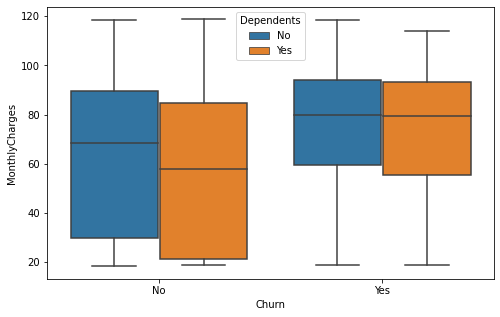

In [223]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x ="Churn", y = "MonthlyCharges", hue = "Dependents");

Il existe de nombreux autres analyses que nous pouvons faire

In [224]:
# Résumé statistique

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Au délà des chiffres, nous voyons une différence des échelles entre les variables.

Cela nous conduira certainement à la **Standardisation**

<a name="PD"></a>
## Prétraitement des données

In [225]:
# Gestion des valeurs manquantes

data = df.copy()

In [226]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [227]:
11/data.shape[0]

0.001561834445548772

In [228]:
# Suppression des valeurs manquantes

data.dropna(inplace = True)

In [229]:
# Encodage des variables binaires

data['gender'] = data['gender'].apply(lambda row: 1 if row == "female" else 0)

In [230]:
binary_columns = data.drop('gender', axis = 1).nunique()[data.drop('gender', axis = 1).nunique() < 3].keys().to_list()

In [231]:
binary_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [232]:
for column in binary_columns:
    data[column] = data[column].apply(lambda row: 1 if row == "Yes" else 0)

In [233]:
# Encodage des variables catégorielles restantes

remaining_cat_vars = data[categorical_columns].nunique()[data[categorical_columns].nunique() > 2 ].keys().to_list()

In [234]:
remaining_cat_vars

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [235]:
remaining_cat_vars_dummies = pd.get_dummies(data = data[remaining_cat_vars], columns = remaining_cat_vars, drop_first = True)

In [236]:
remaining_cat_vars_dummies.head()

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [237]:
# Nouvelle dataframe

data = pd.concat([data['gender'], data[binary_columns], remaining_cat_vars_dummies, data[numerical_colums]], axis = 1)

data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65


In [238]:
#
data.shape

(7032, 31)

Nous avons vu que la variable "TotalCharges" était asymétrique alors transformons la par une fonction racine carrée

In [239]:
data["TotalCharges"] = np.sqrt(data["TotalCharges"])

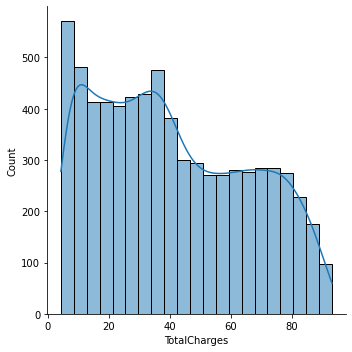

In [240]:
sns.displot(data["TotalCharges"], kde = True);

In [241]:
data.TotalCharges.skew()

0.3089261418986736

In [242]:
# Données d'entrainement 60% et de validation 20% et de test 20%

X = data.drop('Churn', axis = 1)
y = data['Churn']

seed = 123

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.4, random_state = seed, stratify = y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test , test_size = 0.5, random_state = seed, stratify = y_test)


Il faut s'assurer que les proportions de personnes ayant résilié ou non leur contrat soient les mêmes dans les différents ensemble de données

In [243]:
# Fréquence dans les classes dans y & y_train

pd.DataFrame(y).value_counts(normalize=True)

Churn
0        0.734215
1        0.265785
dtype: float64

In [244]:
pd.DataFrame(y_train).value_counts(normalize=True)

Churn
0        0.734297
1        0.265703
dtype: float64

Quant aux problèmes de déséquilibre de classe dans les données, nous pouvons utiliser le réechantillonnage pour créer plus d'équilibre entre les catégories de la variable cible.

Soit créer plus d'observations dans la classe minoritaire ou diminuer les observations de la classe majoritaire.

In [245]:
X2 = X_train

X2['Churn'] = y_train.values

minority = X2[X2.Churn == 1]

majority = X2[X2.Churn == 0]

minority_upsampled =  resample(minority, replace = True, n_samples = len(majority), random_state = seed)

upsampled = pd.concat([majority, minority_upsampled])

upsampled.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
5624,0,0,1,0,1,1,0,1,1,0,...,1,0,0,0,0,0,62,89.80,75.030327,0
6827,0,0,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,60,79.05,68.289091,0
2309,0,0,0,0,1,1,0,1,1,0,...,0,0,1,1,0,0,57,90.45,72.317356,0
6291,0,0,0,0,1,0,0,1,0,0,...,1,1,0,1,0,0,59,79.85,69.181645,0
3036,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,67,49.35,57.631155,0


In [246]:
# Vérification

upsampled['Churn'].value_counts()

0    3098
1    3098
Name: Churn, dtype: int64

In [247]:
X_train_up = upsampled.drop('Churn', axis = 1)

y_train_up = upsampled['Churn']

In [248]:
majority_downsampled =  resample(majority, replace = False, n_samples = len(minority), random_state = seed)

downsampled = pd.concat([minority, majority_downsampled])

downsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
3725,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,1,70.80,8.414274,1
6597,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,7,70.75,21.232051,1
3779,0,0,1,1,1,0,0,1,0,0,...,0,0,1,1,0,0,66,79.40,71.795543,1
2208,0,0,1,0,1,1,0,1,1,0,...,1,0,0,0,1,0,1,100.80,10.039920,1
2894,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,48,60.35,53.818213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,0,1,1,1,1,0,1,0,1,...,0,0,1,0,0,1,39,23.80,30.063267,0
244,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,13,54.80,27.042559,0
6635,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,24,20.10,23.106276,0
2568,0,0,1,1,1,0,0,0,0,1,...,0,0,1,0,0,1,15,19.35,16.698802,0


In [249]:
downsampled['Churn'].value_counts()

1    1121
0    1121
Name: Churn, dtype: int64

In [250]:
# Données d'entrainement sur la méthode de sous-échantillonnage de la classe majoritaire

X_train_down = downsampled.drop('Churn', axis = 1)

y_train_down = downsampled['Churn']

In [251]:
y_train = X_train['Churn']

X_train = X_train.drop('Churn', axis = 1) 

In [252]:
# Définition des données d'entrainement

# Choix possibles : (X_train, y_train), (X_train_up, y_train_up) et (X_train_down, y_train_down)

train_features = X_train_up

train_labels = y_train_up



In [253]:
# Normalisation des données

train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
5624,0,0,1,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,62,89.80,75.030327
6827,0,0,1,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,60,79.05,68.289091
2309,0,0,0,0,1,1,0,1,1,0,...,0,0,0,1,1,0,0,57,90.45,72.317356
6291,0,0,0,0,1,0,0,1,0,0,...,0,1,1,0,1,0,0,59,79.85,69.181645
3036,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,67,49.35,57.631155


In [254]:
scaler = MinMaxScaler()
mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)
X_val = mod_scaler.transform(X_val)
X_test = mod_scaler.transform(X_test)

# Retransformation en datraframe


train_features = pd.DataFrame(train_features, columns = X.columns)
X_val = pd.DataFrame(X_val, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [255]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.859155,0.711940,0.796197
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.830986,0.604975,0.720274
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.788732,0.718408,0.765642
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.816901,0.612935,0.730326
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.929577,0.309453,0.600239


Nous choisissons la F1 score pour évaluer la performance des modèles

In [256]:
# Selection des meilleurs variables prédictrices

rf = RandomForestClassifier()

rf.fit(train_features, train_labels)

print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1032
           1       0.60      0.58      0.59       374

    accuracy                           0.78      1406
   macro avg       0.72      0.72      0.72      1406
weighted avg       0.78      0.78      0.78      1406



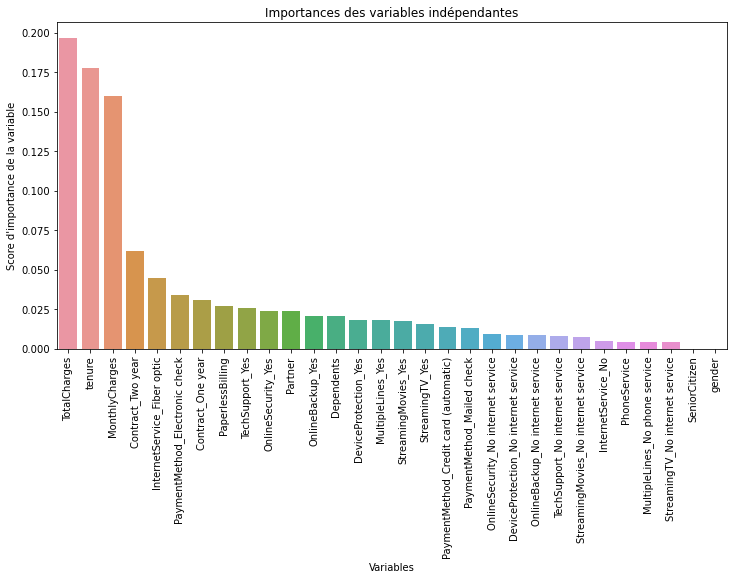

In [257]:
# Importances des variables indépendantes
plt.figure(figsize = (12,6))
vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

sns.barplot(x = vars_imp.index, y = vars_imp)
plt.xticks(rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importances des variables indépendantes")
plt.show()

In [258]:
vars_imp

TotalCharges                             0.196582
tenure                                   0.177680
MonthlyCharges                           0.159669
Contract_Two year                        0.061960
InternetService_Fiber optic              0.044862
PaymentMethod_Electronic check           0.034106
Contract_One year                        0.030677
PaperlessBilling                         0.026855
TechSupport_Yes                          0.025444
OnlineSecurity_Yes                       0.023946
Partner                                  0.023876
OnlineBackup_Yes                         0.020396
Dependents                               0.020295
DeviceProtection_Yes                     0.018192
MultipleLines_Yes                        0.018068
StreamingMovies_Yes                      0.017220
StreamingTV_Yes                          0.015469
PaymentMethod_Credit card (automatic)    0.013886
PaymentMethod_Mailed check               0.013018
OnlineSecurity_No internet service       0.008939


In [259]:
# Variables sélectionnées pour les algorithmes

seuil = 0.004

vars_selected = vars_imp[vars_imp > seuil].index.to_list()

train_features = train_features[vars_selected]

X_val = X_val[vars_selected]

X_test = X_test[vars_selected]


In [260]:
len(train_features.columns)

26

In [261]:
train_features.head()

,TotalCharges,tenure,MonthlyCharges,Contract_Two year,InternetService_Fiber optic,PaymentMethod_Electronic check,Contract_One year,PaperlessBilling,TechSupport_Yes,OnlineSecurity_Yes,...,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,OnlineSecurity_No internet service,DeviceProtection_No internet service,OnlineBackup_No internet service,TechSupport_No internet service,StreamingMovies_No internet service,InternetService_No,PhoneService
0,0.796197,0.859155,0.711940,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.720274,0.830986,0.604975,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.765642,0.788732,0.718408,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.730326,0.816901,0.612935,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.600239,0.929577,0.309453,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Notre objectif est de construire un modèle de classification qui prédit si un client va se désabonner ou non.

Nous utiliserons différents algorithmes ([Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html),
[Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html),
[Classificateur Perceptron Multicouche](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron),
[Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) afin de comparer leurs performances et de choisir le meilleur modèle

<a name="MRG"></a>
[Modèle de Régression Logistic](#MRG)

In [264]:
# Dictionnaire des hyperparamètres

param_grid = {'C':[0.001, 0.01, 1, 10, 50, 100, 500]}

# Object GridSearchCV

grid_logreg_class = GridSearchCV(estimator = LogisticRegression(random_state = seed, max_iter = 500), 
                                                                param_grid = param_grid, scoring = 'f1', cv = 5)

# Entrainement de l'algorithme

logreg_model = grid_logreg_class.fit(train_features, train_labels)

# Meilleur score et meilleur hyperparamètre

print(round(logreg_model.best_score_,3))

print(logreg_model.best_estimator_)

0.775
LogisticRegression(C=1, max_iter=500, random_state=123)


In [266]:
# Fonction d'évaluation de la performance d'un modèle

def model_evaluation(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))
    

In [268]:
model_evaluation(logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1032
           1       0.53      0.78      0.63       374

    accuracy                           0.75      1406
   macro avg       0.71      0.76      0.72      1406
weighted avg       0.80      0.75      0.77      1406



Appliquons l'algorithme [Recursive Feature Eliminator](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) (RFE) sur le modèle afin de voir s'il garde les mêmes performances lorsqu'on réduit le nombre de prédicteurs. En effet, plus le modèle est complexe, plus il est difficile de l'interpréter.

In [271]:
# Création de la fonction de construction d'un modèle avec utilisation de l'algorithme RFE

def model_with_rfe(model):
    rfe_model = RFE(estimator = model, verbose = 0)
    rfe_model.fit(train_features, train_labels)
    mask = rfe_model.support_
    reduced_X = train_features.loc[:,mask]
    print(reduced_X.columns)
    return rfe_model


In [277]:
# LogisticRegression RFE

rfe_logreg_model = model_with_rfe(logreg_model.best_estimator_)
rfe_logreg_model

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'Contract_One year', 'PaperlessBilling', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'StreamingTV_Yes', 'InternetService_No',
       'PhoneService'],
      dtype='object')


RFE(estimator=LogisticRegression(C=1, max_iter=500, random_state=123))

In [273]:
# Evaluation du modèle de régression logistique avec RFE

model_evaluation(rfe_logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1032
           1       0.53      0.78      0.63       374

    accuracy                           0.75      1406
   macro avg       0.71      0.76      0.72      1406
weighted avg       0.80      0.75      0.77      1406



Après réduction des variables, le modèle ne s'est pas amélioré.

<a name="MFA"></a>
[Modèle de Forêt Aléatoire](#MFA)

In [279]:
# Dictionnaire des hyperparamètres

param_grid_rf = {'n_estimators':[10, 50, 100, 500, 1000],
                 'max_depth':[3, 5, 10, 20, None]}

# Object GridSearchCV

grid_rf_class = GridSearchCV(estimator = RandomForestClassifier(random_state = seed), 
                                                                param_grid = param_grid_rf, scoring = 'f1', cv = 5)

# Entrainement de l'algorithme

rf_model = grid_rf_class.fit(train_features, train_labels)

# Meilleur score et meilleur hyperparamètre

print(round(rf_model.best_score_,3))

print(rf_model.best_estimator_)

0.909
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=123)


In [280]:
model_evaluation(rf_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1032
           1       0.60      0.60      0.60       374

    accuracy                           0.79      1406
   macro avg       0.73      0.73      0.73      1406
weighted avg       0.79      0.79      0.79      1406



In [281]:
# RandomForest RFE

rfe_forest_model = model_with_rfe(rf_model.best_estimator_)
rfe_forest_model

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'Contract_One year', 'PaperlessBilling', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'Partner', 'OnlineBackup_Yes',
       'OnlineSecurity_No internet service'],
      dtype='object')


RFE(estimator=RandomForestClassifier(max_depth=20, n_estimators=1000,
                                     random_state=123))

In [282]:
model_evaluation(rfe_forest_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1032
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1406
   macro avg       0.72      0.72      0.72      1406
weighted avg       0.78      0.78      0.78      1406



<a name="CPM"></a>
[Classificateur Perceptron Multicouche](#CPM)

In [283]:
mlp = MLPClassifier(random_state = seed, max_iter = 1000)

parameters = {'hidden_layer_sizes':[(50,), (100,), (200,)],
              #'activation':['identity','logistic', 'tanh', 'relu'],
              'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_cv = GridSearchCV(mlp, parameters, scoring = 'f1', cv = 5, n_jobs=-1)

mlp_cv.fit(train_features, train_labels)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=123),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='f1')

In [284]:
round(mlp_cv.best_score_, 3)

0.856

In [285]:
mlp_cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=123)

In [286]:
model_evaluation(mlp_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1032
           1       0.54      0.61      0.58       374

    accuracy                           0.76      1406
   macro avg       0.70      0.71      0.70      1406
weighted avg       0.77      0.76      0.76      1406



<a name="SVM"></a>
[Support Vector Machine](#SVM)


In [287]:
svm_model = SVC(random_state = seed)

svm_hyp = {'kernel':['linear', 'rbf'],
          'C':[0.1, 1.0, 10, 50, 100]}

svm_cv = GridSearchCV(svm_model, svm_hyp, scoring='f1', cv =5)

svm_cv.fit(train_features, train_labels)

print(round(svm_cv.best_score_, 3))
print(svm_cv.best_estimator_)

0.855
SVC(C=100, random_state=123)


In [289]:
model_evaluation(svm_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1032
           1       0.49      0.65      0.56       374

    accuracy                           0.73      1406
   macro avg       0.68      0.70      0.68      1406
weighted avg       0.76      0.73      0.74      1406



<a name="Concl"></a>
[Conclusion](#Concl)

Nous avons utilisé les données, d'évaluation pour sélectionner le meilleur modèle.

Evaluons le meilleur modèle sur les données de test afin d'apprécier sa performance sur de nouvelles données

In [293]:
# Performance du meilleur modèle sur les données de test

model_evaluation(logreg_model.best_estimator_, X_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1033
           1       0.55      0.78      0.64       374

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.77      0.78      1407



![image](images/marketing-direct.jpg)

In [294]:
# Fin du projet